<a href="https://colab.research.google.com/github/dharanipriyaR24/GOOGLE_KEEP/blob/main/Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "/content/final_processed_data.csv"
data = pd.read_csv(file_path)

In [3]:
data['Actual_Mean'] = np.random.uniform(0, 1, size=len(data))
data['Actual_Std_Dev'] = np.random.uniform(0, 1, size=len(data))
data['Predicted_Mean'] = np.random.uniform(0, 1, size=len(data))
data['Predicted_Std_Dev'] = np.random.uniform(0, 1, size=len(data))

In [4]:
output_file_path = "updated final dataset.csv"
data.to_csv(output_file_path, index=False)

In [5]:
print(f"Updated dataset saved to {output_file_path}")

Updated dataset saved to updated final dataset.csv


**MODEL BUILDING**

In [6]:
file_path = "/content/updated final dataset.csv"
data = pd.read_csv(file_path)

In [7]:
data = data.drop(columns=['Unnamed: 0', 'ID', 'BCODE', 'UID1', 'address', 'address_english', 'occupation', 'occupation_english'])
data = data.dropna()  # Drop rows with missing values


In [8]:
target_column = 'Average C.PEFR'
cluster_columns = ['Cluster_k2', 'Cluster_k3']
features = ['Age', 'BMI', 'Sex', 'Smoke_amount', 'Height', 'Weight',
            'mean_temperature', 'mean_humidity', 'Actual_Mean', 'Actual_Std_Dev',
            'Predicted_Mean', 'Predicted_Std_Dev']

In [9]:
def evaluate_models(data, label, n_splits=5):
    if len(data) < n_splits:
        print(f"Skipping {label} as it has less than {n_splits} samples.")
        return []  # Skip this cluster

    X = data[features]
    y = data[target_column]
    X = pd.get_dummies(X, drop_first=True)  # Encode categorical variables if any
    scaler = StandardScaler()
    X_normalized = scaler.fit_transform(X)

    # Initialize K-Fold for cross-validation
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Define models
    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(alpha=1.0),
        "Lasso Regression": Lasso(alpha=0.1),
        "Decision Tree Regressor": DecisionTreeRegressor(max_depth=5)
    }

    # Store results
    results = []

    for model_name, model in models.items():
        mse_scores, r2_scores, mae_scores = [], [], []

        for train_index, test_index in kf.split(X_normalized):
            X_train, X_test = X_normalized[train_index], X_normalized[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Train the model
            model.fit(X_train, y_train)

            # Predict
            y_pred = model.predict(X_test)

            # Calculate metrics
            mse_scores.append(mean_squared_error(y_test, y_pred))
            r2_scores.append(r2_score(y_test, y_pred))
            mae_scores.append(mean_absolute_error(y_test, y_pred))

        # Append average metrics
        results.append({
            "Model": model_name,
            "Data Label": label,
            "Average MSE": np.mean(mse_scores),
            "Average R2": np.mean(r2_scores),
            "Average MAE": np.mean(mae_scores)
        })

    return results

In [10]:
# Model 1: Without clusters (entire dataset)
model_1_results = evaluate_models(data, "Without Clusters")

# Models for each cluster column
all_cluster_results = []
for cluster_column in cluster_columns:
    if cluster_column in data.columns:
        # Iterate through unique clusters
        for cluster_value in data[cluster_column].unique():
            cluster_data = data[data[cluster_column] == cluster_value]
            label = f"{cluster_column} = {cluster_value}"
            cluster_results = evaluate_models(cluster_data, label)
            all_cluster_results.extend(cluster_results)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.847e+02, tolerance: 9.759e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.775e+01, tolerance: 8.654e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.199e+02, tolerance: 8.090e

Skipping Cluster_k2 = 0.0 as it has less than 5 samples.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.224e+03, tolerance: 6.070e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.541e+03, tolerance: 6.449e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarnin

In [11]:
all_results = model_1_results + all_cluster_results
results_df = pd.DataFrame(all_results)

In [16]:
results_path = 'all_regression_models_with_clusters.csv'
results_df = pd.read_csv(results_path)

In [19]:
print(results_df.columns)

Index(['Model', 'Data Label', 'Average MSE', 'Average R2', 'Average MAE'], dtype='object')


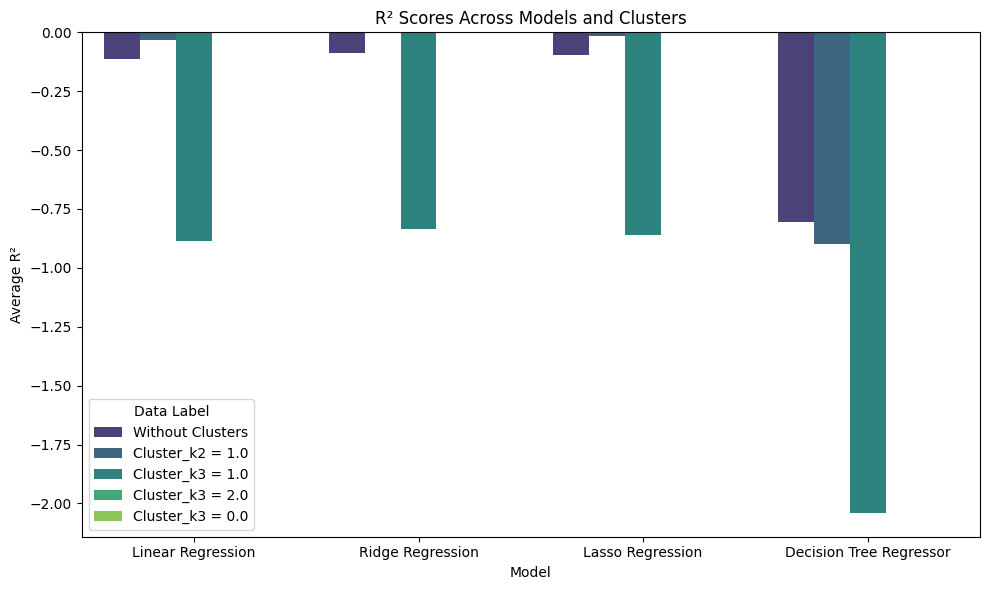

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='Average R2', hue='Data Label', palette='viridis')
plt.title('R² Scores Across Models and Clusters')
plt.xlabel('Model')
plt.ylabel('Average R²')
plt.legend(title='Data Label', loc='best')
plt.tight_layout()
plt.savefig('r2_scores_across_models.png')
plt.show()

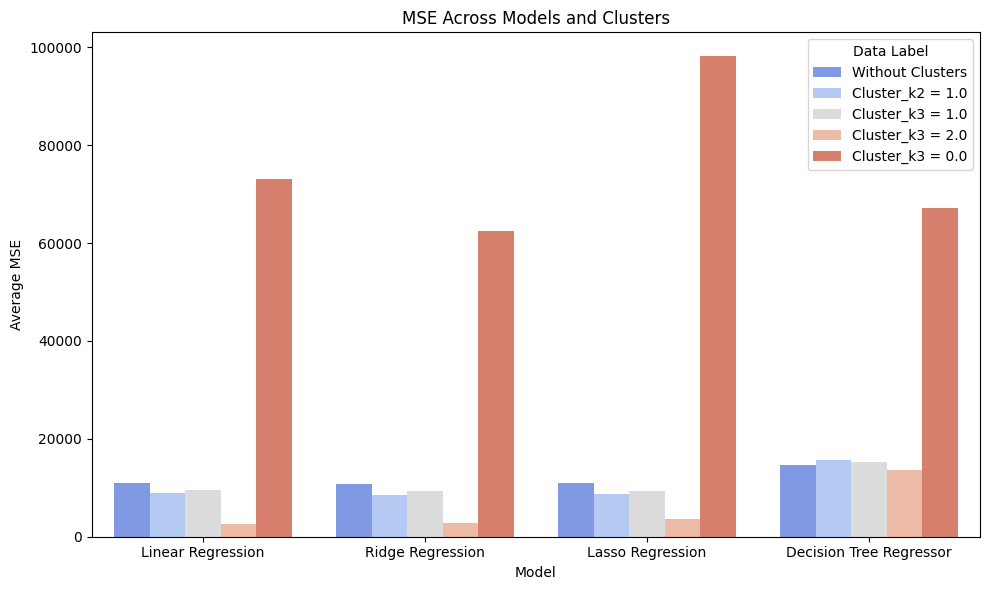

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='Average MSE', hue='Data Label', palette='coolwarm')
plt.title('MSE Across Models and Clusters')
plt.xlabel('Model')
plt.ylabel('Average MSE')
plt.legend(title='Data Label', loc='best')
plt.tight_layout()
plt.savefig('mse_across_models.png')
plt.show()

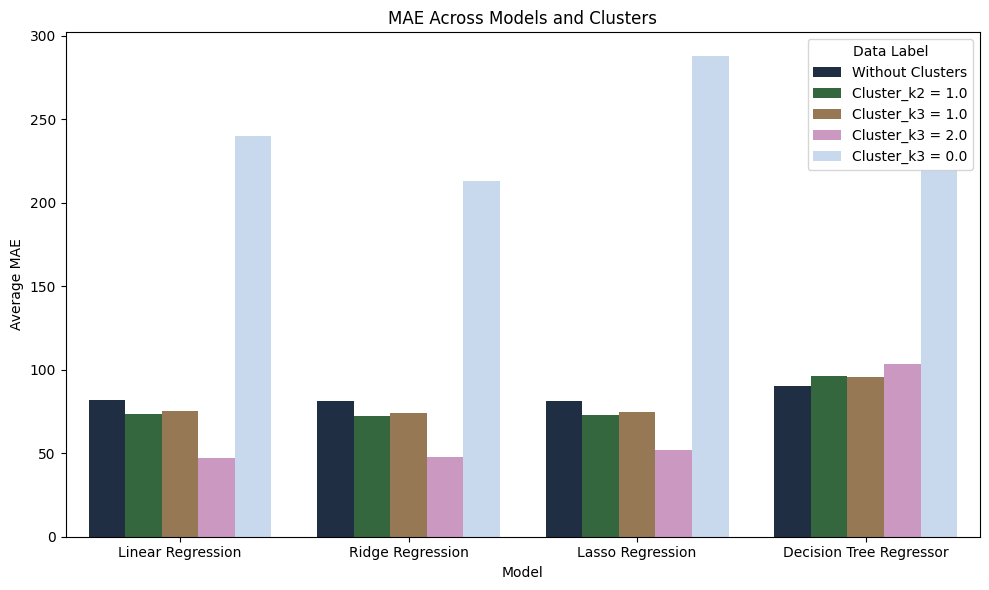

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='Average MAE', hue='Data Label', palette='cubehelix')
plt.title('MAE Across Models and Clusters')
plt.xlabel('Model')
plt.ylabel('Average MAE')
plt.legend(title='Data Label', loc='best')
plt.tight_layout()
plt.savefig('mae_across_models.png')
plt.show()